In [1]:
#Here I will be working on with with California Housing dataset. The data contains information from the 1990 California census.

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [2]:
# Loading the data
from sklearn.datasets import fetch_california_housing 

In [3]:
# Loading the data
housing_california = fetch_california_housing(as_frame=True)
#Dictionary-like object that exposes its keys as attributes.

In [4]:
type(housing_california)

sklearn.utils.Bunch

In [5]:
# Creating a dataframe
housing = housing_california['data'].join(housing_california['target'])

In [6]:
housing.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
type(housing)

pandas.core.frame.DataFrame

In [8]:
#Check data types and descriptive statistics of housing dataset.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


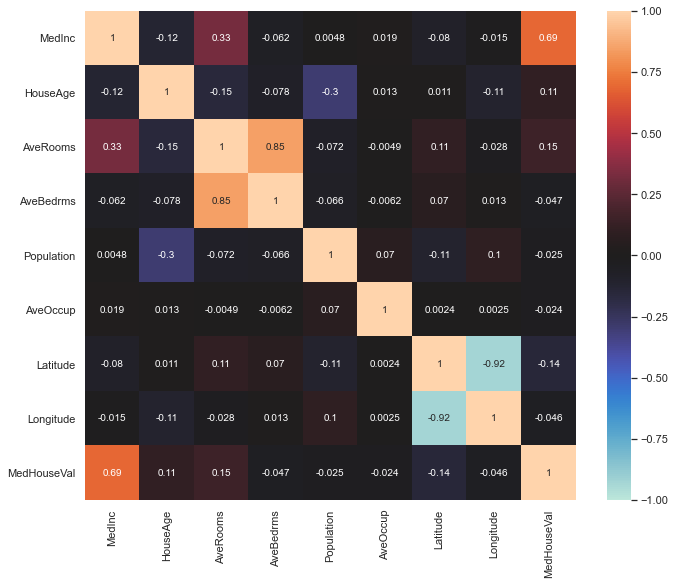

In [10]:
#Visualizing the relationship between the target feature and the rest of variables.

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data=housing.corr(), vmin = -1, vmax = 1, center = 0, annot = True)
plt.show()

#Visualising the relationship of features most strongly related to our target MedHouseVal
#using regplot (regression plot) from Seaborn library.


<AxesSubplot:xlabel='MedHouseVal', ylabel='MedInc'>

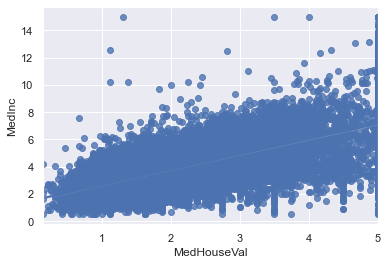

In [14]:
 sns.regplot(x=housing.MedHouseVal, y=housing.MedInc)

<AxesSubplot:xlabel='MedHouseVal', ylabel='AveRooms'>

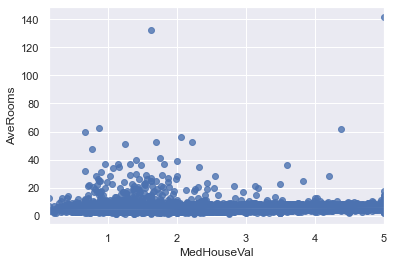

In [15]:
sns.regplot(x=housing.MedHouseVal, y=housing.AveRooms)

<AxesSubplot:xlabel='MedHouseVal', ylabel='HouseAge'>

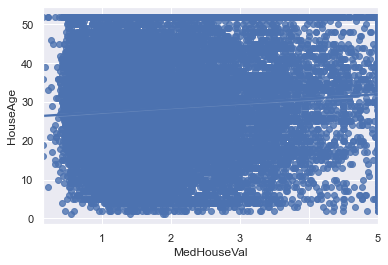

In [16]:
sns.regplot(x=housing.MedHouseVal, y=housing.HouseAge)

<AxesSubplot:xlabel='MedHouseVal', ylabel='Latitude'>

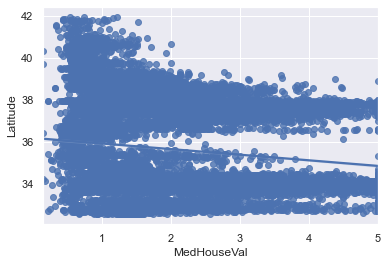

In [18]:
sns.regplot(x=housing.MedHouseVal, y=housing.Latitude)

In [19]:
X = housing['MedInc'].values.reshape(-1, 1) #features
y = housing['MedHouseVal'] #target

In [20]:
model = LinearRegression()

In [21]:
model.fit(X, y)

LinearRegression()

In [23]:
print('R squared:', model.score(X, y))
#R-squared means that our model explains 47.3% of the variance of the target variable

R squared: 0.47344749180719903


In [29]:
print('Slope of the model:', model.coef_)
#It means that for one unit increase in Median Income,
#there is an increase of 0.42 units (dollars, points, cats etc.) in Median House Price.

Slope of the model: [0.41793849]


In [30]:
y_pred = model.predict(X)
print(y_pred)

[3.9302773  3.92033036 3.48400258 ... 1.1613512  1.23123052 1.44914365]


In [32]:
import statsmodels.formula.api as smf

In [33]:
#Creating the model
lm_model_1 = smf.ols(formula='MedHouseVal ~ MedInc', data=housing).fit()

#Coefficients of the model
lm_model_1.params

Intercept    0.450856
MedInc       0.417938
dtype: float64

In [34]:
lm_model_1.predict()

array([3.9302773 , 3.92033036, 3.48400258, ..., 1.1613512 , 1.23123052,
       1.44914365])

In [35]:
#p-value of the model coefficients
#It hows that Median Income variable significantly predict Median House Values
lm_model_1.pvalues

Intercept    9.882299e-248
MedInc        0.000000e+00
dtype: float64

In [36]:
#Summary of fitted model
lm_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:41:25   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4509      0.013     34.082      0.000       0.425       0.477
MedInc         0.4179      0.003    136.223      0.000       0.412       0.424
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#Another model 
lm_model_2 = smf.ols(formula='MedHouseVal ~ MedInc + HouseAge', data=housing).fit()

In [38]:
lm_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                 1.070e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:41:47   Log-Likelihood:                -24899.
No. Observations:               20640   AIC:                         4.980e+04
Df Residuals:                   20637   BIC:                         4.983e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1019      0.019     -5.320      0.000      -0.139      -0.064
MedInc         0.4317      0.003    144.689      0.000       0.426       0.438
HouseAge       0.0174      0.000     38.726      0.000       0.017       0.018
==============================================================================
Omnibus:                     4099.868   Durbin-Watson:                   0.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9707.077
Skew:                           1.118   Prob(JB):                         0.00
Kurtosis:                       5.507   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
feature_columns = housing[housing.columns[:-1]]
target_column = housing['MedHouseVal']

X = feature_columns
y = target_column

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [41]:
X_test.shape

(5160, 8)

In [42]:
y_test.shape

(5160,)

In [43]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
#The regression model has to find the most optimal coefficients for all the attributes
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
MedInc,0.439091
HouseAge,0.009599
AveRooms,-0.103311
AveBedrms,0.616730
Population,-0.000008
AveOccup,-0.004488
Latitude,-0.417353
Longitude,-0.430614


In [45]:
y_pred = regressor.predict(X_test)

In [46]:
df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}, index=range(len(y_test)))
df

,Actual,Predicted
0,1.369,2.278262
1,2.413,2.796067
2,2.007,1.908871
3,0.725,1.025755
4,4.600,2.958599
...,...,...
5155,1.212,1.450424
5156,1.375,1.461399
5157,1.609,2.156786
5158,2.273,3.035077


<AxesSubplot:>

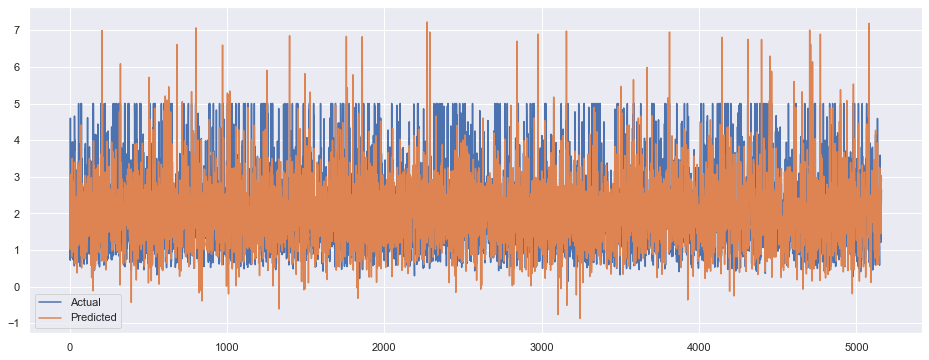

In [47]:
df.plot(figsize=(16,6))

In [48]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.7351277481981665
